Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

- Öncelikle, Sıcaklık verilerini Kaggle'dan indirin.
- Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.
- Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sicaklik = pd.read_csv("weatherHistory.csv")

In [3]:
X = sicaklik[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)' , 
              'Pressure (millibars)']]
y = sicaklik['Apparent Temperature (C)']

In [4]:
lrm = LinearRegression()
lrm.fit(X, y)
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.55395113e+01 -3.22375796e-01  5.08683496e-03 -5.80345617e-04]
Sabit değer (bias): 
 40.086462790777524


In [5]:
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.405
Model:                                  OLS   Adj. R-squared:                  0.405
Method:                       Least Squares   F-statistic:                 1.639e+04
Date:                      Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                              10:30:09   Log-Likelihood:            -3.4044e+05
No. Observations:                     96453   AIC:                         6.809e+05
Df Residuals:                         96448   BIC:                         6.809e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     40.0865      0.265    151.491      0.000      39.568      40.605
Humidity                 -35.5395      0.140   -254.610      0.000     -35.813     -35.266
Wind Speed (km/h)         -0.3224      0.004    -81.150      0.000      -0.330      -0.315
Wind Bearing (degrees)     0.0051      0.000     20.435      0.000       0.005       0.006
Pressure (millibars)      -0.0006      0.000     -2.551      0.011      -0.001      -0.000
==============================================================================
Omnibus:                     3414.455   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3814.376
Skew:                          -0.465   Prob(JB):                         0.00
Kurtosis:                       3.291   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
X = sicaklik[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)' , 
              'Pressure (millibars)']]
y = sicaklik['Apparent Temperature (C)']

In [7]:
lrm = LinearRegression()
lrm.fit(X, y)
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.55395113e+01 -3.22375796e-01  5.08683496e-03 -5.80345617e-04]
Sabit değer (bias): 
 40.086462790777524


#### Gauss-Markov 
##### 1. Katsayılarda modelin doğrusallığı

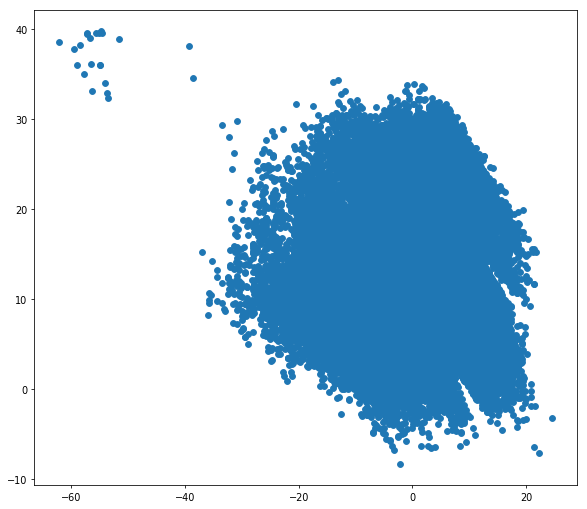

In [8]:
tahmin = lrm.predict(X)
artik = y-tahmin
plt.figure(figsize=(10,9), dpi=70)
plt.scatter(artik, tahmin)
plt.show()

Artık ve tahminler belirli bir patern izlemediğinden katsayılarda model doğrusaldır.

##### 2. Hata terimi ortalamada sıfır olmalıdır

In [9]:
tahmin = lrm.predict(X)
hata = y - tahmin

print("Tıbbi maliyetler modelinin ortalama hatası : {:.15f}".format(np.mean(hata)))

Tıbbi maliyetler modelinin ortalama hatası : 0.000000000000003


Hata terimi ortalamada sıfırdır.

##### 3. Homoscedasticity


In [10]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hata)
lev_stats = levene(tahmin, hata)

print("Bartlett test değeri : {} ve p değeri : {}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {} ve p değeri : {}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 3574.9965229931076 ve p değeri : 0.0
Levene test değeri   : 3486.963987941483 ve p değeri : 0.0


Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

##### 4. multicollinearity

In [11]:
corr = X.corr().values
np.linalg.eig(corr)

(array([1.2543905 , 0.74883167, 1.00689157, 0.98988627]),
 array([[-0.62551827,  0.63330178, -0.44054495,  0.11651563],
        [ 0.70437821,  0.70887549,  0.02581033,  0.02609035],
        [ 0.29313974, -0.28968094, -0.66908093,  0.61845351],
        [-0.16324008,  0.11184516,  0.59798385,  0.77669727]]))

- İlk dizide sıfıra yakın değer olmadığından multicollinearity yoktur.

#### 5. hata terimleri birbiriyle ilişkisiz olmalıdır

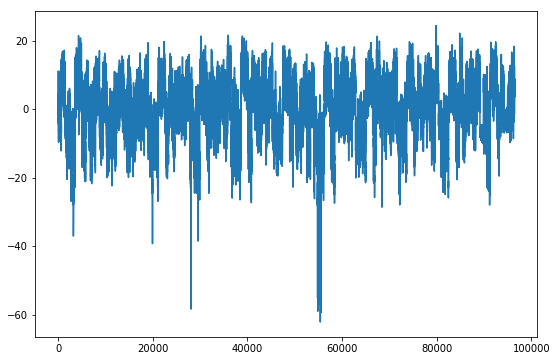

In [12]:
plt.figure(figsize=(9,6))
plt.plot(hata)
plt.show()

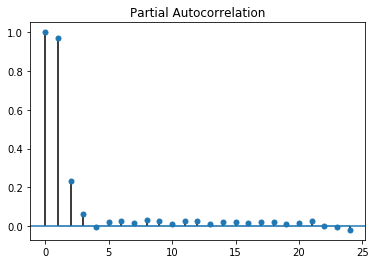

In [14]:
# Import required libraries
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_pacf(hata, lags=24)

# Show plot
plt.show()

#### 6. özellikler hatalarla korele olmamalıdır

In [16]:
X_hata_ekli = pd.concat([X, hata], axis=1)
sutun = list(X.columns)
sutun.append('Hata')
X_hata_ekli.columns = sutun
X_hata_ekli.corr()['Hata']

Humidity                 -7.847567e-15
Wind Speed (km/h)        -4.487082e-16
Wind Bearing (degrees)   -3.104189e-17
Pressure (millibars)     -4.259309e-16
Hata                      1.000000e+00
Name: Hata, dtype: float64

Hataların değişkenlerle korelasyonu 0'a yakındır.

### 7.Hatalarin Dagilim Grafigi

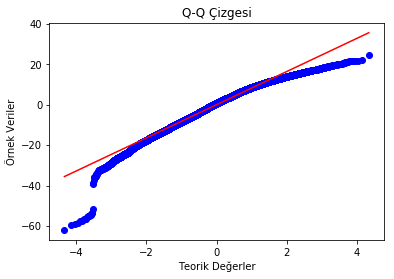

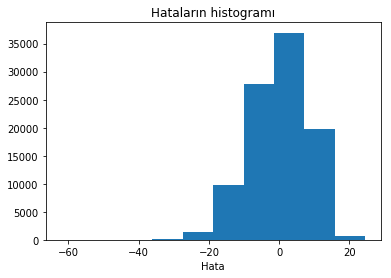

In [17]:
res = stats.probplot(hata, plot=plt)
plt.title("Q-Q Çizgesi")
plt.xlabel("Teorik Değerler")
plt.ylabel("Örnek Veriler")
plt.show()

plt.hist(hata)
plt.xlabel("Hata",)
plt.title("Hataların histogramı")

plt.show()

In [19]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(hata)
norm_stats = normaltest(hata)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 3814.375606736218 ve p değeri : 0.0
Normal test değeri      : 3414.4549907100286  ve p değeri : 0.000000000000000000000000000000


Test değerleri 0 olduğundan hataların normal dağılmadığını söyleyebiliriz .

Ev Fiyatları verilerini Kaggle'dan indirin.
- Önceki derste oluşturduğunuz modeli yeniden gerçekleştirin.
-Yukarıdaki tüm varsayımları kontrol edin ve bazı varsayımların karşılanmadığı durumlarda sonuçları tartışın.

In [ ]:
#Importing the data
houses_df = pd.read_csv('train.csv')
numerical_features = houses_df.dtypes[houses_df.dtypes != "object"].index
categoricel_features = houses_df.dtypes[houses_df.dtypes == "object"].index
#missing data
total = houses_df.isnull().sum().sort_values(ascending=False)
percent = (houses_df.isnull().sum()/houses_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#dealing with missing data
houses_df = houses_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
houses_df = houses_df.drop(houses_df.loc[houses_df['Electrical'].isnull()].index)
corr_list = list(np.abs(houses_df.corr().iloc[-1, 0:-1]).sort_values(ascending=False)[0:20].index)

In [ ]:
X = houses_df[corr_list]
y = houses_df.SalePrice
lrm = LinearRegression()
lrm.fit(X, y)
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

In [ ]:
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

#### Gauss-Markov 
##### 1. Katsayılarda modelin doğrusallığı

In [ ]:
X = houses_df[corr_list]
tahmin = lrm.predict(X)
artik = y-tahmin
plt.figure(figsize=(10,9), dpi=70)
plt.scatter(artik, tahmin)
plt.show()

Artık ve tahminler belirli bir patern izlemediğinden katsayılarda model doğrusaldır.

##### 2. Hata terimi ortalamada sıfır olmalıdır

In [ ]:
tahmin = lrm.predict(X)
hatalar = y - tahmin

print("Ev fiyatları modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

Hata terimi ortalamada sıfıra çok yakındır.

##### 3. Homoscedasticity

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, artik)
lev_stats = levene(tahmin, artik)

print("Bartlett test değeri : {} ve p değeri : {}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {} ve p değeri : {}".format(lev_stats[0], lev_stats[1]))

Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

##### 4.multicollinearity

In [ ]:
corr = X.corr().values
np.linalg.eig(corr)[0]

In [ ]:
np.linalg.eig(corr)[0][15]

Sıfıra yakın değer bulunuğunan multicollinearity vardır. Korelasyon matrisini gözden geçirmemiz gerekir 

#### 5. Hata Terimleri birbirleriyle iliskisiz olmalidir.

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(artik)

from statsmodels.tsa.stattools import acf
plt.subplot(122)
acf_data = acf(artik)
plt.plot(acf_data[1:])

plt.show()

Hata terimleri arasindaki otokorelasyon oldukca dusuktur.

#### 6. özellikler hatalarla korele olmamalıdır

In [ ]:
X_hata_ekli = pd.concat([X, artik], axis=1)
sutun = list(X.columns)
sutun.append('Hatalar')
X_hata_ekli.columns = sutun
X_hata_ekli.corr()['Hatalar']

Hataların değişkenlerle korelasyonu 0'a yakındır.

#### 7.Hatalarin Dağılımı

In [ ]:
res = stats.probplot(artik, plot=plt)
plt.title("Q-Q Çizgesi")
plt.xlabel("Teorik Değerler")
plt.ylabel("Örnek Veriler")
plt.show()

plt.hist(artik)
plt.xlabel("Hatalar",)
plt.title("Hataların histogramı")

plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(artik)
norm_stats = normaltest(artik)

print("Jarque-Bera test değeri : {} ve p değeri : {}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {}  ve p değeri : {}".format(norm_stats[0], norm_stats[1]))

Her iki test de hatalarimizin normal dagilmadigini gosterir. 